In [4]:
import numpy as np
import math
from scipy.integrate import quad

def Hermite_polynomial_iterative(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    
    H0 = 1
    H1 = 2 * x
    for k in range(2, n + 1):
        Hk = 2 * x * H1 - 2 * (k - 1) * H0
        H0, H1 = H1, Hk
    return H1


def Hermite_derivative(n, x):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return 2 * n * Hermite_polynomial_iterative(n - 1, x)

# Metoda: początkowe przybliżenia przez wartości własne macierzy Jacobi'ego (Golub-Welsch)
def initial_guesses_hermite_zeros(n):
    # Macierz trójdiagonalna (symetryczna)
    i = np.arange(1, n)
    a = np.zeros(n)  # wszystkie wartości diagonalne Hermite'a są 0
    b = np.sqrt(i / 2)  # off-diagonalne elementy
    J = np.diag(a) + np.diag(b, 1) + np.diag(b, -1)
    # Wartości własne = miejsca zerowe
    
    return np.sort(np.linalg.eigvalsh(J))

# Ehrlich–Aberth method
def ehrlich_aberth_hermite(n, tol=1e-14, max_iter=100):
    x = initial_guesses_hermite_zeros(n)  # start z dobrych przybliżeń
    for _ in range(max_iter):
        p_vals = np.array([Hermite_polynomial_iterative(n, xi) for xi in x])
        dp_vals = np.array([Hermite_derivative(n, xi) for xi in x])
        correction = p_vals / dp_vals
        for j in range(n):
            sum_term = np.sum([1 / (x[j] - x[k]) for k in range(n) if k != j])
            correction[j] /= (1 - correction[j] * sum_term)
        x_new = x - correction
        if np.max(np.abs(x_new - x)) < tol:
            break
        x = x_new
    return np.sort(x)

def Gauss_Hermite_weights(roots, n):
    weights = []
    for xi in roots:
        H_n_minus_1 = Hermite_polynomial_iterative(n - 1, xi)
        weight = (2**(n - 1) * math.factorial(n) * np.sqrt(np.pi)) / (n**2 * H_n_minus_1**2)
        weights.append(weight)
    return weights

# Całkowanie funkcji f z użyciem kwadratury Gaussa–Hermite’a
def Gauss_Hermite_integral(n, f):
    roots = ehrlich_aberth_hermite(n)
    weights = Gauss_Hermite_weights(roots, n)
    
    integral_value = 0.0
    for i in range(n):
        integral_value += weights[i] * f(roots[i])
    
    return integral_value

def f2(x):
    return np.cos(1 + x)  # umiarkowanie oscylacyjna funkcja

def f3(x):
    return x**2  # funkcja parzysta – dobrze dopasowana do symetrycznego przedziału

def f4(x):
    return np.exp(-x**2 / 2)  # Gaussian wewnątrz Gaussa – test tłumienia

def f5(x):
    return np.sinc(x)  # ciekawa, gładka i tłumiona funkcja

def f6(x):
    return np.exp(-np.abs(x))  # wykładniczy tłumik, mniej gładki (punkt kłopotliwy w x=0)

def f7(x):
    return np.sin(5 * x) / (1 + x**2)  # oscylacje + tłumienie – dobry test graniczny

def f8(x):
    return x**4 # wielomian * waga – da się policzyć analitycznie

def f9(x):
    return np.sin(10 * x)  # mocno oscylacyjna – test na trudne przypadki
  # Przykładowa funkcja do całkowania

def integrand2(x):
    return np.exp(-x**2) * f2(x)  # Przykładowa funkcja do całkowania
def integrand3(x):
    return np.exp(-x**2) * f3(x)  # Przykładowa funkcja do całkowania
def integrand4(x):
    return np.exp(-x**2) * f4(x)  # Przykładowa funkcja do całkowania
def integrand5(x):
    return np.exp(-x**2) * f5(x)  # Przykładowa funkcja do całkowania
def integrand6(x):
    return np.exp(-x**2) * f6(x)  # Przykładowa funkcja do całkowania
def integrand7(x):
    return np.exp(-x**2) * f7(x)  # Przykładowa funkcja do całkowania
def integrand8(x):
    return np.exp(-x**2) * f8(x)  # Przykładowa funkcja do całkowania
def integrand9(x):
    return np.exp(-x**2) * f9(x)  # Przykładowa funkcja do całkowania

res2,_ = quad(integrand2, -np.inf, np.inf)
res3,_ = quad(integrand3, -np.inf, np.inf)
res4,_ = quad(integrand4, -np.inf, np.inf)
res5,_ = quad(integrand5, -np.inf, np.inf)
res6,_ = quad(integrand6, -np.inf, np.inf)
res7,_ = quad(integrand7, -np.inf, np.inf)
res8,_ = quad(integrand8, -np.inf, np.inf)
res9,_ = quad(integrand9, -np.inf, np.inf)

n_Vals = [3,5,7,9,11,17,23,30]


print("Wynik dokładny całki: " , res2)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f2))

print("Wynik dokładny całki: " , res3)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f3))
print("Wynik dokładny całki: " , res4)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f4))
print("Wynik dokładny całki: " , res5)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f5))
print("Wynik dokładny całki: " , res6)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f6))
print("Wynik dokładny całki: " , res7)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f7))
print("Wynik dokładny całki: " , res8)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f8))
print("Wynik dokładny całki: " , res9)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f9))



def f_singular(x): return 1 / (x**2 + 0.03)
def f_far_peak(x): return np.exp(-(x - 10)**2)  # pik daleko od zera
def f_oscillatory(x):
    return np.sin(10 * x) / (x**2 + 1e-10)  # oscylacje + osobliwość w x=0

def integrad_singular(x):
    return np.exp(-x**2) * f_singular(x)  # Przykładowa funkcja do całkowania
def integrad_far_peak(x):
    return np.exp(-x**2) * f_far_peak(x)  # Przykładowa funkcja do całkowania
def integrad_oscillatory(x):
    return np.exp(-x**2) * f_oscillatory(x)  # Przykładowa funkcja do całkowania

res_singular,_ = quad(integrad_singular, -np.inf, np.inf)
res_far_peak,_ = quad(integrad_far_peak, -np.inf, np.inf)
res_oscillatory,_ = quad(integrad_oscillatory, -np.inf, np.inf)

n_Vals = [3,5,7,9,11,17,23,30]
print("Wynik dokładny całki: " , res_singular)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f_singular))
print("Wynik dokładny całki: " , res_far_peak)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f_far_peak))
print("Wynik dokładny całki: " , res_oscillatory)
for n in n_Vals:
    print(n," :",Gauss_Hermite_integral(n, f_oscillatory))


Wynik dokładny całki:  0.7458270609311501
3  : 0.7467156552569891
5  : 0.7458279410255321
7  : 0.7458270613152702
9  : 0.7458270609312448
11  : 0.7458270609311501
17  : 0.7458270609311501
23  : 0.7458270609311509
30  : 0.7458270609311505
Wynik dokładny całki:  0.8862269254527599
3  : 0.8862269254527569
5  : 0.8862269254527573
7  : 0.8862269254527578
9  : 0.8862269254527598
11  : 0.8862269254527579
17  : 0.886226925452756
23  : 0.886226925452757
30  : 0.8862269254527579
Wynik dokładny całki:  1.447202509116535
3  : 1.4607185390852684
5  : 1.4477487011229775
7  : 1.4472244596460677
9  : 1.447203389506563
11  : 1.447202544393694
17  : 1.4472025091187974
23  : 1.4472025091165353
30  : 1.4472025091165353
Wynik dokładny całki:  0.9736789250782587
3  : 1.0820048518748657
5  : 0.979634014328941
7  : 0.9738537342066046
9  : 0.9736820945007327
11  : 0.9736789639763659
17  : 0.9736789250782696
23  : 0.9736789250782588
30  : 0.9736789250782584
Wynik dokładny całki:  1.0912827215300944
3  : 1.35523

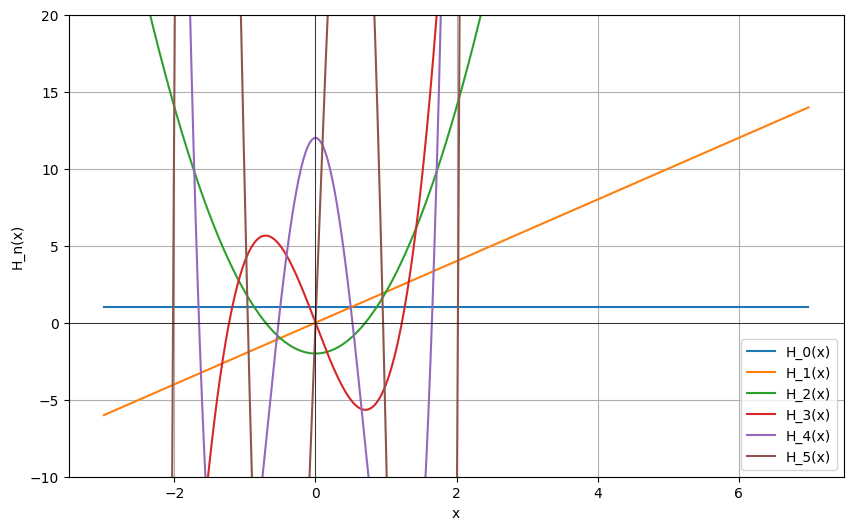

In [5]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
X = np.arange(-3, 7, 0.01)

plt.figure(figsize=(10, 6))

# Rysujemy pierwsze 10 wielomianów Legendre'a
for i in range(6):
    Y = [Hermite_polynomial_iterative(i, x) for x in X]
    plt.plot(X, Y, label=f'H_{i}(x)')

plt.xlabel('x')
plt.ylabel('H_n(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-10,20)
plt.grid(True)
plt.legend()